### How to Extract a Social Network from a Novel
This python script extracts an undirected co-occurrence network of characters from the novel Moby-Dick (Herman Melville). 

Get a novel (text file), e.g. from http://www.gutenberg.org. 

In [1]:
from urllib.request import urlopen
textfile = urlopen("http://www.gutenberg.org/files/2701/old/moby10b.txt")
moby = textfile.read()
print(moby[:500])

b"**The Project Gutenberg Etext of Moby Dick, by Herman Melville**\r\n#3 in our series by Herman Melville\r\n\r\nThis Project Gutenberg version of Moby Dick is based on a combination\r\nof the etext from the ERIS project at Virginia Tech and another from\r\nProject Gutenberg's archives, as compared to a public-domain hard copy.\r\n\r\nCopyright laws are changing all over the world, be sure to check\r\nthe copyright laws for your country before posting these files!!\r\n\r\nPlease take a look at the important informati"


To find out if characters appear together in a defined text sequence, split the text in parts, e.g. paragraphs. Check first, how the sequences are actually split in your text file (here **\r\n**: carriage return, Newline).

In [2]:
import re  # for regex use.

In [3]:
moby_paragraph_list = []    #make empty list
moby_paragraphs = re.split(r'\r\n', moby.decode("utf-8"))   #split into paragraphs.
for para in moby_paragraphs:
    moby_paragraph_list.append(str(para + '\n'))    #save in list
print(len(moby_paragraph_list)) #prints the number of paragraphs of the novel.

23245


Define a dictionary with all characters (values) and their synonyms (keys) you want to be considered. And maybe your story is told by a first-person narrator?

In [4]:
moby_names = {"Ishmael": "Ishmael",
              "I": "Ishmael",
              "Moby": "Moby Dick",
              "Ahab": "Ahab",
              #"whale": "Moby Dick",
              #"Whale": "Moby Dick",
              "Mapple": "Father Mapple",
              "Bildad": "Captain Bildad",
              "Peleg": "Captain Peleg",
              "Starbuck": "Starbuck",
              "chief mate": "Starbuck",
              "Chief Mate": "Starbuck",
              "Stubb": "Stubb",
              "Second Mate": "Stubb",
              "second mate": "Stubb",
              "Flask": "Flask",
              "third mate": "Flask",
              "Third mate": "Flask",
              "King-Post": "Flask",
              "Queequeg": "Queequeg",
              "Tashtego": "Tashtego",
              "Daggoo": "Daggoo",
              "Fedallah": "Fedallah",
              "fire worshipper": "Fedallah",
              "Fire worshipper": "Fedallah",
              "Pip": "Pip",
              "Pippin": "Pip",
              "Dough-Boy": "Dough Boy",
              "Fleece": "The Cook",
              "Blacksmith": "Blacksmith",
              "blacksmith": "Blacksmith",
              "Perth": "Blacksmith",
              "Carpenter": "Carpenter",
              "Captain Boomer": "Captain Boomer",
              "Captain de Deer": "Captain de Deer",
              "Derick": "Captain de Deer",
              "Bachelor": "Captain of the Bachelor",
              "Bouton": "Bouton d'Or",
              "BOUTON": "Bouton d'Or",
              "bouton": "Bouton d'Or",
              "Rosebud": "Bouton d'Or",
              "Rachel": "The Rachel",
              "Delight": "Delight",
              "Elijah": "Elijah"
              }

A list of co-occurrences in a text sequence takes all possible realtions into account. 

E.g. _"I watched Ahab looking out for the Whale"_: Ishmael <-> Ahab, Moby <-> Ahab and Moby <-> Ishmael.

In [5]:
from itertools import combinations

In [6]:
def all_combis(liste):
    """
    """
    return_liste = []
    for element in combinations(liste, 2):
        return_liste.append(element)
    return return_liste
#If a name appears more than one time in a sequence, it will be count only once.
resultat = []
list_temp = []
for sentence in moby_paragraph_list:
    if len(list_temp) != 0:
        del list_temp
        list_temp = []
    for key in moby_names:
        if key in sentence and moby_names.get(key) not in list_temp:
            list_temp.append(moby_names.get(key))
    for element in all_combis(list_temp):
        resultat.append(element)
print(resultat[:20])

[('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Starbuck', 'Stubb'), ('Ishmael', 'Delight'), ('Ishmael', 'Father Mapple'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg'), ('Ishmael', 'Queequeg')]


You might want to store your data in a Dataframe...

In [7]:
import pandas as pd
df = pd.DataFrame.from_records(resultat)
df.head()

,0,1
0,Ishmael,Queequeg
1,Ishmael,Queequeg
2,Ishmael,Queequeg
3,Ishmael,Queequeg
4,Ishmael,Queequeg


...or in a csv file.

In [8]:
df.to_csv("moby.csv", sep=';', header=False, index=False, mode='w', quoting=None, quotechar='"', line_terminator='\n')

See https://networkx.github.io/documentation/stable/ for the _networkx_ package documentation.

In [9]:
import networkx as nx

In [10]:
G = nx.read_edgelist("moby.csv", delimiter=';', nodetype=str, encoding="utf-8", create_using=nx.Graph())

In [11]:
print(nx.info(G))
#The network consists of 23 characters and their are connected over 60 edges (graphs). 
#In average, a character is connected to 5 other characters in the story.

Name: 
Type: Graph
Number of nodes: 23
Number of edges: 60
Average degree:   5.2174


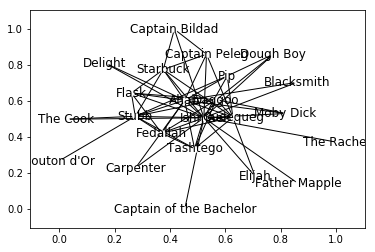

In [12]:
%matplotlib inline
#change parameters for a more fancy and more informative layout.
nx.draw_networkx(G, node_size=30, node_color="w")